Message Frequency Analysis

Run this file in the python environment

__________________________________________________

Import the csv datafile here.

In the file explorer right click the dataset and copy path, then paste between the "..."

Any backslashes should be replaced by double backslash.

Make sure that the csv file is seperated by commas.

In [12]:
import pandas as pd
ais = pd.read_csv("Dataset.csv",sep=",")
ais.head()

: 

In [ ]:
ais.shape

(6599735, 34)

Subset the dataset for a specific region

In [ ]:
ais_subset = ais[ais["Region"]=='QH69']

In [ ]:
# Convert 'Timestamp' column to datetime type
ais_subset['Timestamp'] = pd.to_datetime(ais_subset['Timestamp'])

# Sort the DataFrame by 'MMSI' and 'Timestamp' to ensure proper order within each vessel
ais_subset = ais_subset.sort_values(by=['MMSI', 'Timestamp'])

# Calculate the time difference between consecutive messages for each vessel (grouped by 'MMSI')
ais_subset['time_diff'] = ais_subset.groupby('MMSI')['Timestamp'].diff()

# Display the first 10 entries of the 'time_diff' column
ais_subset['time_diff'].head()

In [ ]:
# Convert the 'time_diff' column to string type and fill missing values
ais_subset['time_diff'] = ais_subset['time_diff'].fillna('00:00:00')
ais_subset['time_diff'] = ais_subset['time_diff'].astype(str)

# Split the 'time_diff' column and extract the seconds and minutes part
ais_subset['seconds'] = ais_subset['time_diff'].str.split(':').str[-1].astype(float)
ais_subset['minutes'] = ais_subset['time_diff'].str.split(':').str[-2].astype(float)

# Check the results
ais_subset.head()

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
81934,2023-10-29 02:56:30.997,BSVDO,A,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00,0.000,0.0
81949,2023-10-29 02:56:40.996,BSVDO,B,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:09.999000,9.999,0.0
81965,2023-10-29 02:56:50.997,BSVDO,A,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10.001000,10.001,0.0
81982,2023-10-29 02:57:00.997,BSVDO,B,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10,10.000,0.0
81998,2023-10-29 02:57:10.997,BSVDO,A,4.0,2579991.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:10,10.000,0.0


In [ ]:
# Remove "0 days " from the time_diff
ais['time_diff'] = ais['time_diff'].str.replace('0 days ', '')

# Convert the cleaned strings to timedelta
ais['time_diff'] = pd.to_timedelta(ais['time_diff'])

Subset based on the shipborne mobile equipement reporting intervals (see report for more info)

In [ ]:
# Ensure that the "SOG" column is numerical type for the subsetting
ais["SOG"] = pd.to_numeric(ais["SOG"], errors='coerce')

# Ship at anchor or moored and not moving faster than 3 knots
ais_anchor_less_3knots = ais[
    (ais["SOG"] < 3.0) & 
    ((ais["Navigation Status"] == 'At anchor') | 
     (ais["Navigation Status"] == 'Moored'))
]

# Ship at anchor or moored and moving faster than 3 knots
ais_anchor_more_3knots = ais[
    (ais["SOG"] > 3.0) & 
    ((ais["Navigation Status"] == 'At anchor') | 
     (ais["Navigation Status"] == 'Moored'))
]

# Ship 0-14 knots
ais_0_14 = ais[
    ((ais["SOG"] > 0.0) &
     (ais["SOG"]<= 14.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] == 0)
]

ais_0_14_turning = ais[
    ((ais["SOG"] > 0.0) &
     (ais["SOG"]<= 14.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] != 0)
]
ais_14_23 = ais[
    ((ais["SOG"] > 14.0) &
     (ais["SOG"]<= 23.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] == 0)
]

ais_14_23_turning = ais[
    ((ais["SOG"] > 14.0) &
     (ais["SOG"]<= 23.0))
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] != 0)
]

ais_more_23 = ais[
    (ais["SOG"] > 23.0)
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] == 0)
]

ais_more_23_turning = ais[
    (ais["SOG"] > 23.0)
     & 
    ((ais["Navigation Status"] != 'At anchor') | 
     (ais["Navigation Status"] != 'Moored'))
     & 
    (ais["ROT"] != 0)
]


MemoryError: Unable to allocate 906. MiB for an array with shape (18, 6599735) and data type float64

Ship at anchor or moored and not moving faster than 3 knots

In [ ]:
ais_anchor_less_3knots[ais_anchor_less_3knots["minutes"]>3.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes


Plot this data into a map to see the route where the frequency requirements where not met.

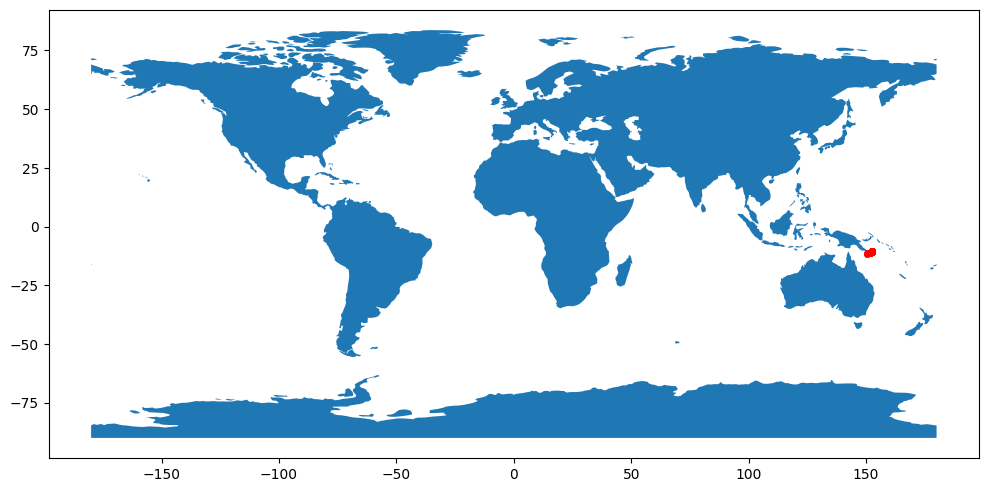

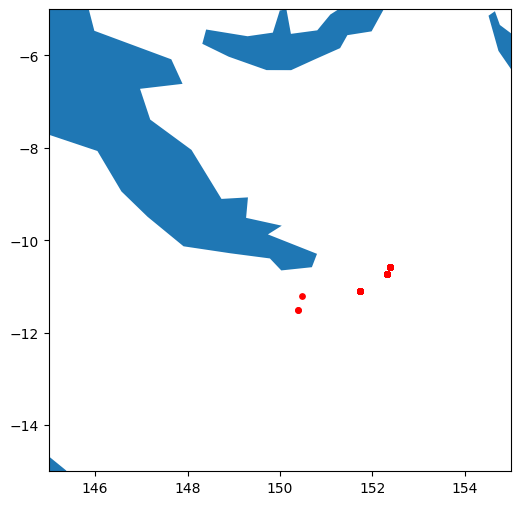

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_anchor_less_3knots['Longitude'], ais_anchor_less_3knots['Latitude'])]
gdf = GeoDataFrame(ais_anchor_less_3knots, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship at anchor or moored and moving faster than 3 knots

In [ ]:
ais_anchor_more_3knots[ais_anchor_more_3knots["seconds"]>10.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes


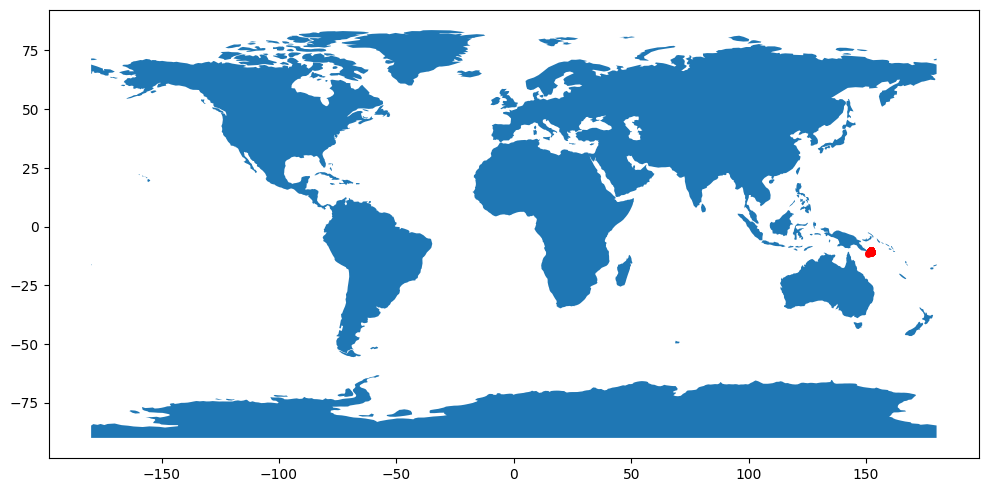

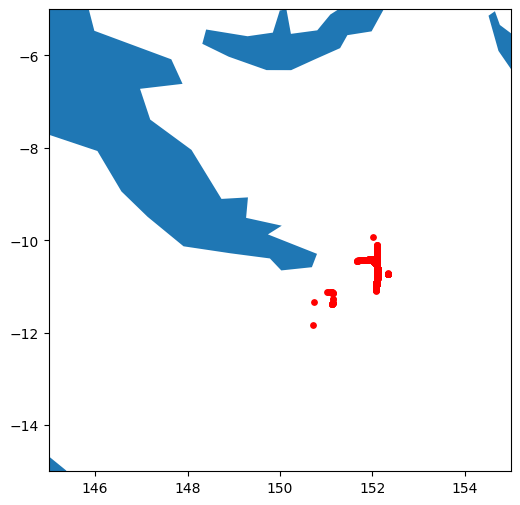

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_anchor_more_3knots['Longitude'], ais_anchor_more_3knots['Latitude'])]
gdf = GeoDataFrame(ais_anchor_more_3knots, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship 0-14 knots

In [ ]:
ais_0_14[ais_0_14["seconds"]>10]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes


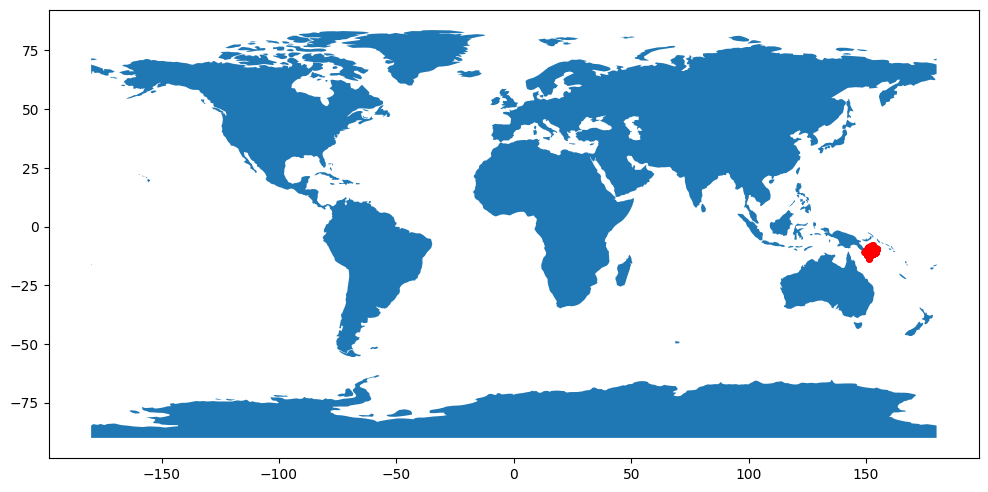

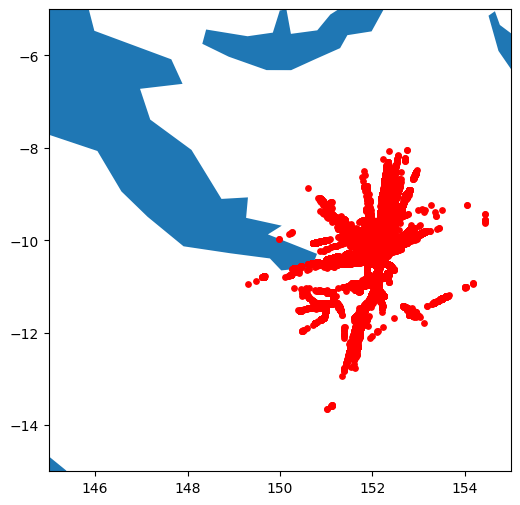

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_0_14['Longitude'], ais_0_14['Latitude'])]
gdf = GeoDataFrame(ais_0_14, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship 0-14 knots and changing course

In [ ]:
ais_0_14_turning[ais_0_14_turning["seconds"]>3.333]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
694,2023-10-28 07:40:00.780,BSVDM,B,3.0,353080000,Underway using engine,0.0,0.0,127.0,10.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:07.165000,7.165,0.0
1074,2023-10-28 07:50:47.942,BSVDM,B,3.0,353080000,Underway using engine,0.0,0.0,127.0,10.1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.460000,3.460,0.0
1434,2023-10-28 08:00:58.983,BSVDM,A,1.0,563025500,Underway using engine,0.0,0.0,1.0,13.1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.459000,3.459,0.0
8207,2023-10-28 10:25:01.161,BSVDM,A,1.0,477151600,Underway using engine,0.0,0.0,253.0,14.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:04.640000,4.640,0.0
8636,2023-10-28 10:34:01.161,BSVDM,B,3.0,353080000,Underway using engine,0.0,0.0,127.0,9.6,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:04.400000,4.400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593655,2024-01-26 12:57:41.868,BSVDM,A,1.0,636021513.0,Underway using engine,0.0,0.0,252.0,12.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.901000,3.901,0.0
6593730,2024-01-26 12:58:41.868,BSVDM,A,1.0,636021513.0,Underway using engine,0.0,0.0,254.0,12.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.901000,3.901,0.0
6593810,2024-01-26 12:59:41.868,BSVDM,A,1.0,636021513.0,Underway using engine,0.0,0.0,253.0,12.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.901000,3.901,0.0
6597594,2024-01-26 13:49:41.095,BSVDM,B,1.0,374450000.0,Underway using engine,0.0,0.0,1.0,9.9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.862000,3.862,0.0


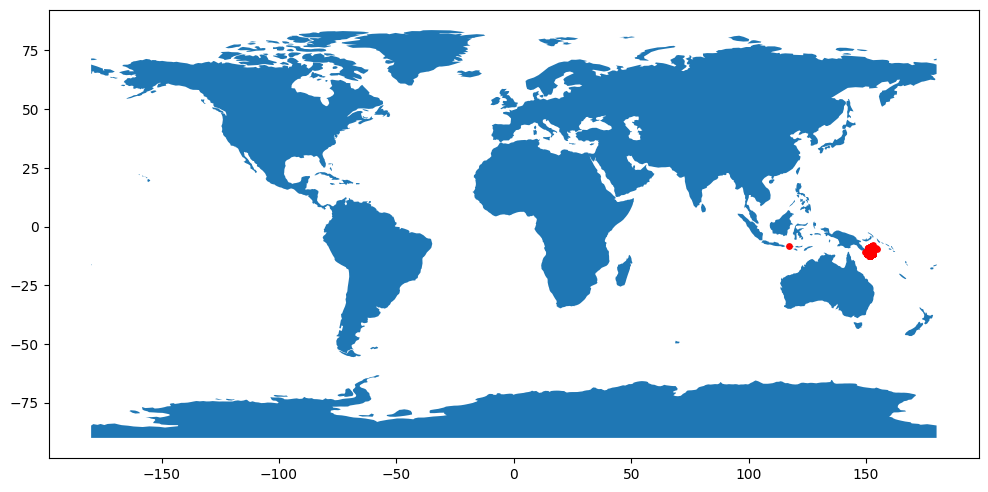

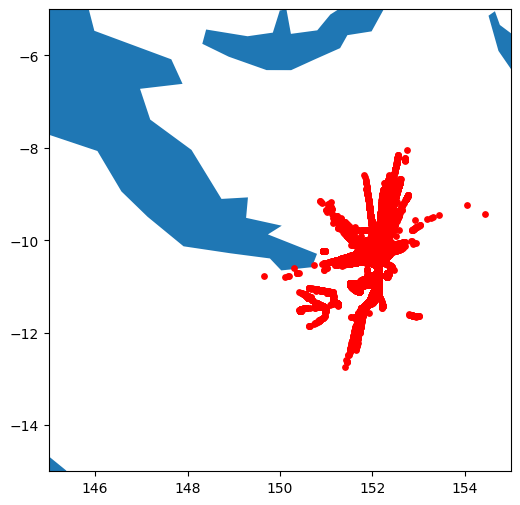

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_0_14_turning['Longitude'], ais_0_14_turning['Latitude'])]
gdf = GeoDataFrame(ais_0_14_turning, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship 14-23 knots

In [ ]:
ais_14_23[ais_14_23["seconds"]>6]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
136,2023-10-28 07:22:30.978,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,0.0,16.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:07.440000,7.440,0.0
322,2023-10-28 07:27:50.280,BSVDM,A,1.0,477151600,Underway using engine,0.0,0.0,0.0,14.4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.161000,6.161,0.0
1192,2023-10-28 07:54:19.842,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,0.0,17.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.162000,6.162,0.0
1394,2023-10-28 07:59:49.965,BSVDM,A,1.0,538009733,Underway using engine,0.0,0.0,0.0,17.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.262000,6.262,0.0
1765,2023-10-28 08:09:50.024,BSVDM,A,1.0,538009733,Underway using engine,0.0,0.0,0.0,17.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.281000,6.281,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6486599,2024-01-25 12:01:44.816,BSVDM,B,1.0,310597000,Underway using engine,0.0,0.0,0.0,16.2,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.841000,6.841,0.0
6486698,2024-01-25 12:03:44.815,BSVDM,B,1.0,310597000,Underway using engine,0.0,0.0,0.0,16.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.840000,6.840,0.0
6486795,2024-01-25 12:05:44.895,BSVDM,B,1.0,310597000,Underway using engine,0.0,0.0,0.0,15.9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.440000,6.440,0.0
6486889,2024-01-25 12:07:44.877,BSVDM,B,1.0,310597000,Underway using engine,0.0,0.0,0.0,16.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.041000,6.041,0.0


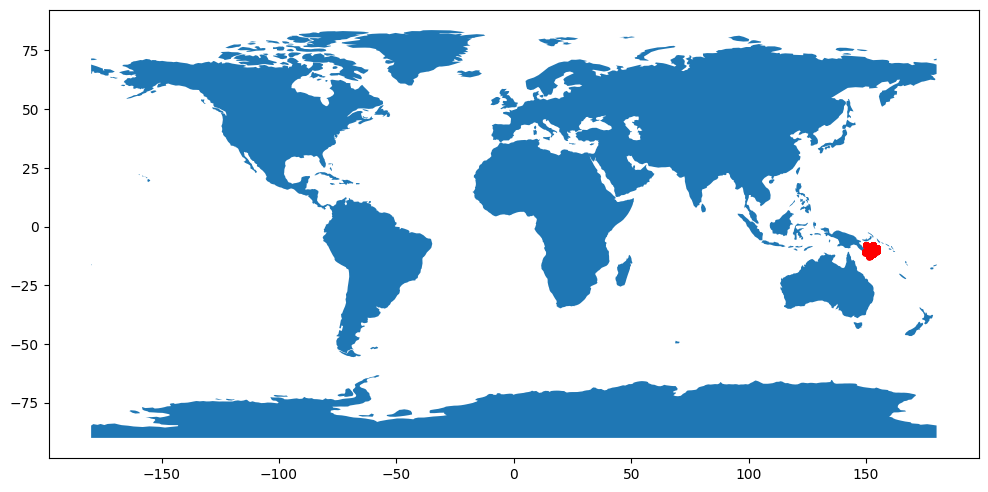

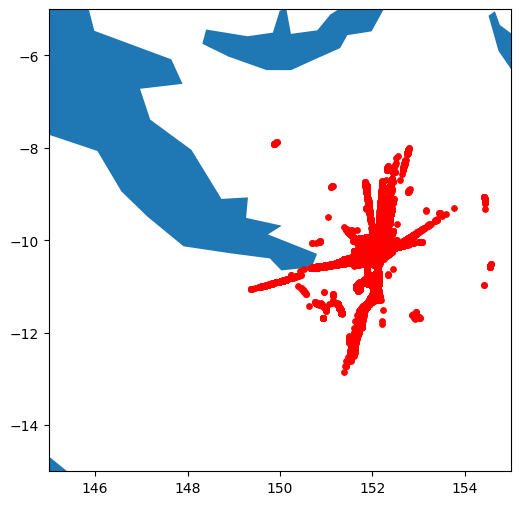

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_14_23['Longitude'], ais_14_23['Latitude'])]
gdf = GeoDataFrame(ais_14_23, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship 14-23 knots and changing course

In [ ]:
ais_14_23_turning[ais_14_23_turning["seconds"]>2.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
28,2023-10-28 07:18:37.363,BSVDM,A,1.0,477151600,Underway using engine,0.0,0.0,252.0,14.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.842000,3.842,0.0
34,2023-10-28 07:18:49.797,BSVDM,A,1.0,477151600,Underway using engine,0.0,0.0,251.0,14.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:05.313000,5.313,0.0
156,2023-10-28 07:23:07.590,BSVDM,B,1.0,538009733,Underway using engine,0.0,0.0,249.0,16.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:04.044000,4.044,0.0
173,2023-10-28 07:23:49.958,BSVDM,A,1.0,538009733,Underway using engine,0.0,0.0,249.0,16.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.409000,6.409,0.0
192,2023-10-28 07:24:20.218,BSVDM,B,1.0,477151600,Underway using engine,0.0,0.0,250.0,14.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:06.058000,6.058,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595616,2024-01-26 13:24:30.914,BSVDM,B,1.0,255903590.0,Underway using engine,0.0,0.0,253.0,16.7,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.122000,2.122,0.0
6595743,2024-01-26 13:26:30.913,BSVDM,B,1.0,255903590.0,Underway using engine,0.0,0.0,253.0,16.8,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.239000,2.239,0.0
6596087,2024-01-26 13:31:18.753,BSVDM,B,1.0,255903590.0,Underway using engine,0.0,0.0,251.0,17.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.159000,3.159,0.0
6596406,2024-01-26 13:35:18.433,BSVDM,B,1.0,255903590.0,Underway using engine,0.0,0.0,255.0,17.1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.661000,2.661,0.0


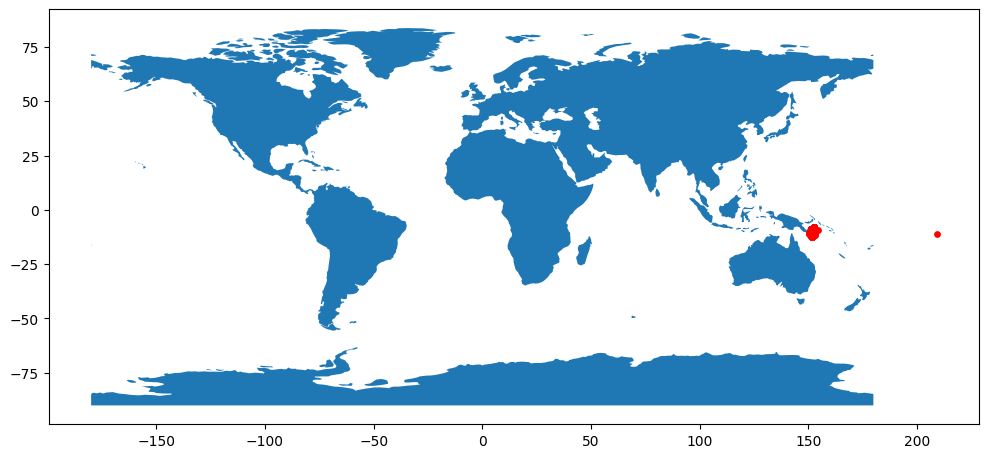

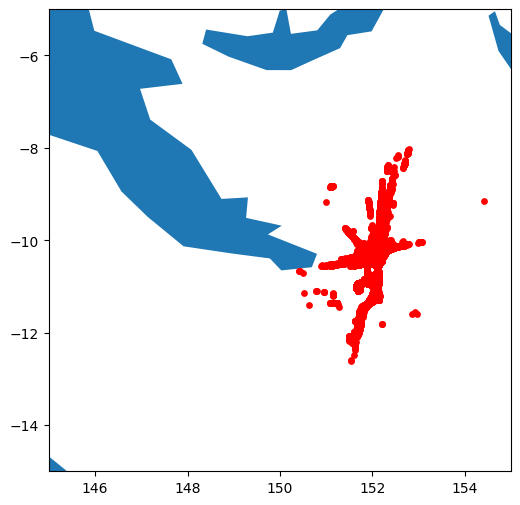

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_14_23_turning['Longitude'], ais_14_23_turning['Latitude'])]
gdf = GeoDataFrame(ais_14_23_turning, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship >23 knots

In [ ]:
ais_more_23[ais_more_23["seconds"]>2.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
985685,2023-11-10 03:15:31.935,BSVDM,A,1.0,466219000,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:04.239000,4.239,0.0
985826,2023-11-10 03:19:20.456,BSVDM,B,1.0,466219000,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.762000,2.762,0.0
2481335,2023-11-29 16:46:08.036,BSVDM,A,1.0,232015131,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.435000,3.435,0.0
3018787,2023-12-06 22:09:35.687,BSVDM,A,3.0,477387200,Underway using engine,0.0,0.0,0.0,24.1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.138000,2.138,0.0
3018823,2023-12-06 22:09:59.129,BSVDM,A,3.0,477387200,Underway using engine,0.0,0.0,0.0,31.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.060000,2.060,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023073,2023-12-06 23:16:24.652,BSVDM,B,3.0,477387200,Underway using engine,0.0,0.0,0.0,78.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.612000,2.612,0.0
3023084,2023-12-06 23:16:35.452,BSVDM,A,3.0,477387200,Underway using engine,0.0,0.0,0.0,34.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.341000,2.341,0.0
3240583,2023-12-10 06:33:32.458,BSVDM,A,1.0,373046000.0,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.360000,2.360,0.0
5028678,2024-01-04 21:51:50.641,BSVDM,B,1.0,636017029.0,Underway using engine,0.0,0.0,0.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.995000,2.995,0.0


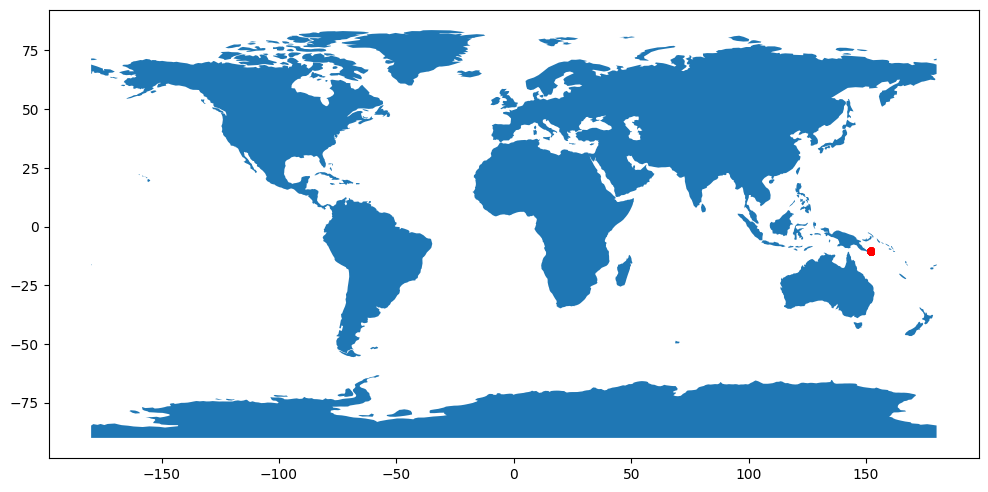

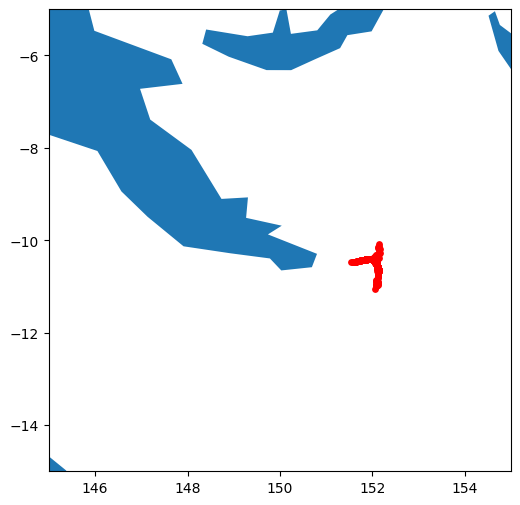

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_more_23['Longitude'], ais_more_23['Latitude'])]
gdf = GeoDataFrame(ais_more_23, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Ship >23 knots and changing course

In [ ]:
ais_more_23_turning[ais_more_23_turning["seconds"]>2.0]

,Timestamp,Packet Type,Channel,Message Type,MMSI,Navigation Status,Repeat Indicator,IMO,ROT,SOG,...,C,D,Prop message 1,Prop message 2,Prop message 3,Prop message 4,Prop message 5,time_diff,seconds,minutes
1019719,2023-11-10 15:55:35.437,BSVDM,A,1.0,356362000.0,Underway using engine,0.0,0.0,251.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.277000,3.277,0.0
2453360,2023-11-29 06:42:28.947,BSVDM,B,3.0,111610604,Power-driven vessel pushing ahead or towing al...,0.0,0.0,225.0,40.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.119000,2.119,0.0
2483014,2023-11-29 17:33:48.862,BSVDM,A,1.0,232015131,Underway using engine,0.0,0.0,1.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:04.165000,4.165,0.0
2491150,2023-11-29 21:22:58.686,BSVDM,B,1.0,232015131,Underway using engine,0.0,0.0,255.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.119000,2.119,0.0
2808886,2023-12-04 01:33:20.915,BSVDM,B,1.0,210526000,Underway using engine,0.0,0.0,253.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.820000,3.820,0.0
3201293,2023-12-09 23:53:28.444,BSVDM,B,1.0,636018731,Underway using engine,0.0,0.0,251.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:03.222000,3.222,0.0
3201830,2023-12-09 23:59:28.743,BSVDM,B,1.0,636018731,Underway using engine,0.0,0.0,1.0,102.3,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:02.300000,2.300,0.0


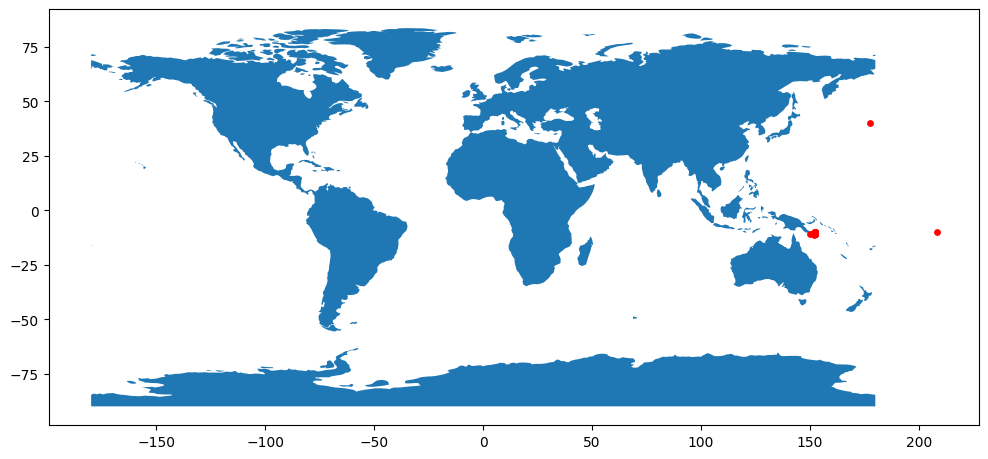

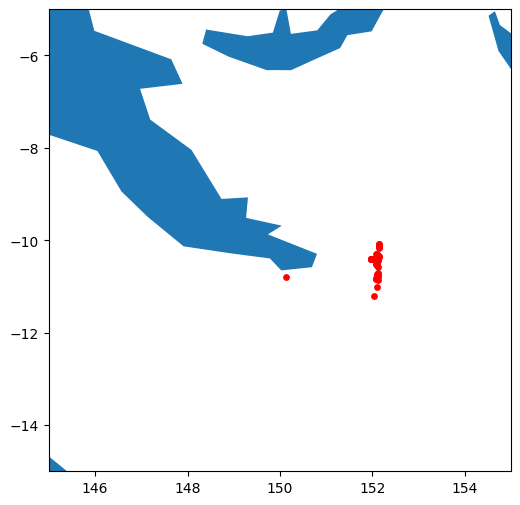

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(ais_more_23_turning['Longitude'], ais_more_23_turning['Latitude'])]
gdf = GeoDataFrame(ais_more_23_turning, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(12, 8)), marker='o', color='red', markersize=15)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot the world map
ax = world.plot(figsize=(10, 6))

# Plot your points on the map
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(145, 155) #long
ax.set_ylim(-15, -5) #lat

# Show the plot
plt.show()

Create a histogram to see the distribution of the time intervals between consecutive messages of a vessel

MemoryError: Unable to allocate 36.1 MiB for an array with shape (4731528,) and data type float64

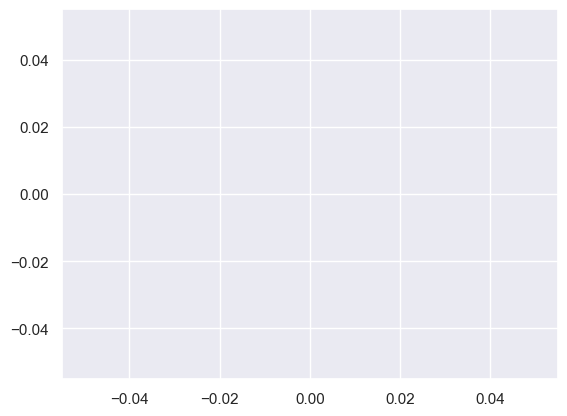

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.histplot(data=ais_subset, x="seconds", kde=True) # Change to x='minutes' if needed

plt.title('Time interval consecutive messages in seconds')
plt.xlabel('Seconds')
plt.ylabel('Frequency')

plt.show()